In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

In [2]:
nNode = 4
nPerNode = 4

nItMin = 7
nItMax = 20

In [3]:
x = y = np.linspace(-1, 1, nNode*nPerNode)
x_plot = np.arange((nNode*nPerNode)**2)

n_it = np.array([nItMin + int((nItMax - nItMin)*np.exp(-(i**2 + j**2))) for j in y for i in x])
n_it_hydro = np.copy(n_it.reshape(nNode*nPerNode, nNode*nPerNode))

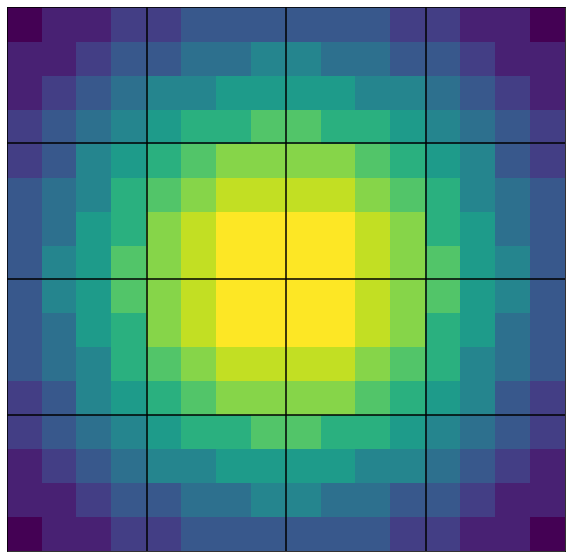

In [4]:
X, Y = np.meshgrid(x, y)
plt.pcolor(X, Y, n_it_hydro)


x_min, x_max = x[0] - (x[1]-x[0])/2, x[-1] + (x[1]-x[0])/2
y_min, y_max = y[0] - (y[1]-y[0])/2, y[-1] + (y[1]-y[0])/2

plt.xlim(x_min, x_max)
for i in range(1, nNode):
    y_node = (y[i*nPerNode] + y[i*nPerNode - 1])/2
    plt.plot([x_min, x_max], [y_node, y_node],'k-', linewidth=1.5)

    
plt.ylim(y_min, y_max)
for i in range(1, nNode):
    x_node = (x[i*nPerNode] + x[i*nPerNode - 1])/2
    plt.plot([x_node, x_node], [y_min, y_max],'k-', linewidth=1.5)


plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelleft=False)
plt.show()

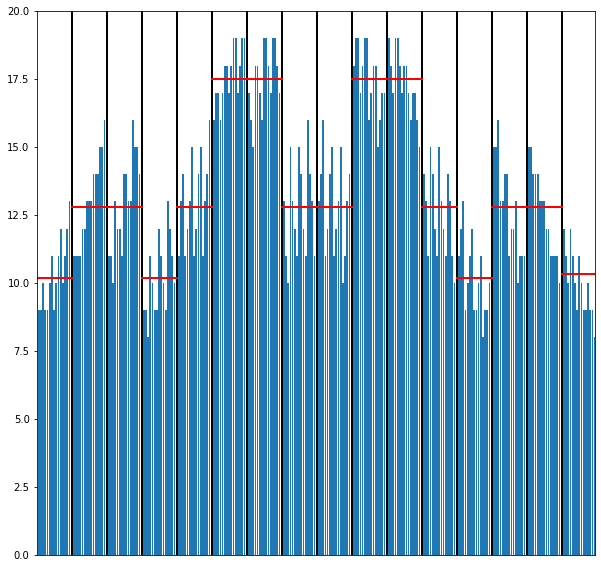

13.337 average iteration, 17.5 bottleneck, cov: 0.197, max/avg-1: 0.312, 1-avg/max: 0.238


In [5]:
for i_node in range(nNode):
    for j_node in range(nNode):
        node_idx   = i_node*nNode + j_node
        node_begin = node_idx*nPerNode*nPerNode
        
        for i_particle in range(nPerNode):
            for j_particle in range(nPerNode):
                particle_idx = i_particle*nPerNode + j_particle
                n_it[node_begin + particle_idx] = n_it_hydro[i_node*nPerNode + i_particle, j_node*nPerNode + j_particle]

plt.bar(x_plot, n_it)

plt.xlim(x_plot[0], x_plot[-1])
y_lim = max(n_it) + 1
plt.ylim(0, y_lim)
for i in range(1, nNode*nNode):
    x_node = x_plot[i*nPerNode*nPerNode]
    plt.plot([x_node, x_node], [0, y_lim],'k-', linewidth=2)
    
n_it_avg = np.zeros(nNode*nNode)
for i in range(nNode*nNode):
    x_node_begin = x_plot[i*nPerNode*nPerNode]
    x_node_end   = x_plot[(i + 1)*nPerNode*nPerNode] if i != nNode*nNode - 1 else x_plot[-1]
    
    n_it_avg[i] = np.sum(n_it[x_node_begin:x_node_end])/(x_node_end - x_node_begin)
    
    plt.plot([x_node_begin, x_node_end], [n_it_avg[i], n_it_avg[i]],'r-', linewidth=2)
    
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

avg_it = round(np.mean(n_it_avg), 3)
max_it = round(np.max(n_it_avg), 3)
cov_it = round(np.std(n_it_avg)/avg_it, 3)

lb_1 = round(max_it/avg_it-1, 3)
lb_2 = round(1-avg_it/max_it, 3)

print(f"{avg_it} average iteration, {max_it} bottleneck, cov: {cov_it}, max/avg-1: {lb_1}, 1-avg/max: {lb_2}")

In [6]:
n_it_nuclear = np.zeros((nNode*nPerNode, nNode*nPerNode))
for i in range(0, (nNode*nPerNode)**2):
    node_id     = i %  (nNode**2)
    particle_id = i // (nNode**2)
    
    row_id  = particle_id %  nPerNode
    line_id = particle_id // nPerNode
    
    node_row_id  = node_id %  nNode
    node_line_id = node_id // nNode
    
    n_it_nuclear[node_line_id*nPerNode + line_id, node_row_id*nPerNode + row_id] = n_it[i]

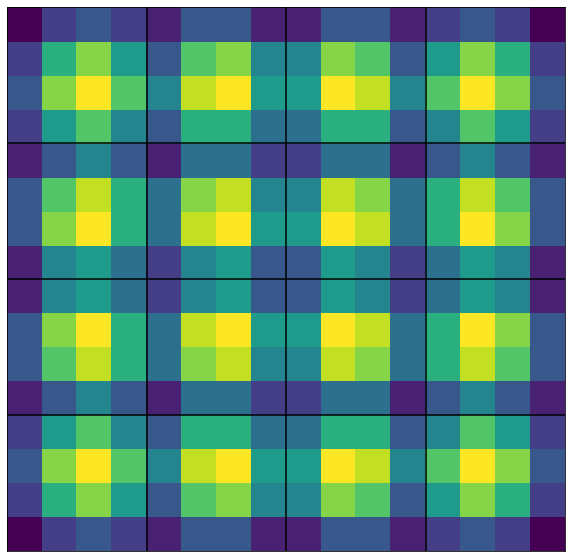

In [7]:
X, Y = np.meshgrid(x, y)
plt.pcolor(X, Y, n_it_nuclear)

x_min, x_max = x[0] - (x[1]-x[0])/2, x[-1] + (x[1]-x[0])/2
y_min, y_max = y[0] - (y[1]-y[0])/2, y[-1] + (y[1]-y[0])/2

plt.xlim(x_min, x_max)
for i in range(1, nNode):
    y_node = (y[i*nPerNode] + y[i*nPerNode - 1])/2
    plt.plot([x_min, x_max], [y_node, y_node],'k-', linewidth=1.5)

    
plt.ylim(y_min, y_max)
for i in range(1, nNode):
    x_node = (x[i*nPerNode] + x[i*nPerNode - 1])/2
    plt.plot([x_node, x_node], [y_min, y_max],'k-', linewidth=1.5)

plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelleft=False)
plt.show()

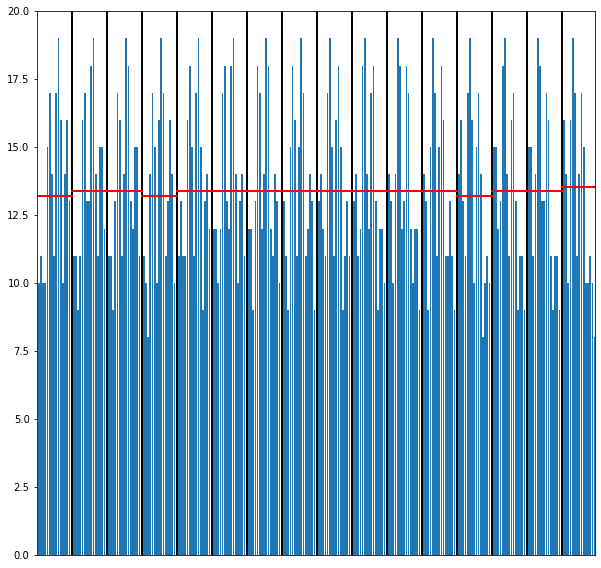

13.35 average iteration, 13.533 bottleneck, cov: 0.006, max/avg-1: 0.014, 1-avg/max: 0.014


In [8]:
n_it_ = np.zeros((nNode*nPerNode)**2)
for i_node in range(nNode):
    for j_node in range(nNode):
        node_idx   = i_node*nNode + j_node
        node_begin = node_idx*nPerNode*nPerNode
        
        for i_particle in range(nPerNode):
            for j_particle in range(nPerNode):
                particle_idx = i_particle*nPerNode + j_particle
                n_it_[node_begin + particle_idx] = n_it_nuclear[i_node*nPerNode + i_particle, j_node*nPerNode + j_particle]

plt.bar(x_plot, n_it_)

plt.xlim(x_plot[0], x_plot[-1])
y_lim = max(n_it_) + 1
plt.ylim(0, y_lim)
for i in range(1, nNode*nNode):
    x_node = x_plot[i*nPerNode*nPerNode]
    plt.plot([x_node, x_node], [0, y_lim],'k-', linewidth=2)

n_it_avg_ = np.zeros(nNode*nNode)
for i in range(nNode*nNode):
    x_node_begin = x_plot[i*nPerNode*nPerNode]
    x_node_end   = x_plot[(i + 1)*nPerNode*nPerNode] if i != nNode*nNode - 1 else x_plot[-1]
    
    n_it_avg_[i] = np.sum(n_it_[x_node_begin:x_node_end])/(x_node_end - x_node_begin)
    
    plt.plot([x_node_begin, x_node_end], [n_it_avg_[i], n_it_avg_[i]],'r-', linewidth=2)

plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

avg_it_ = round(np.mean(n_it_avg_), 3)
max_it_ = round(np.max(n_it_avg_), 3)
cov_it_ = round(np.std(n_it_avg_)/avg_it_, 3)

lb_1_ = round(max_it_/avg_it_-1, 3)
lb_2_ = round(1-avg_it_/max_it_, 3)

print(f"{avg_it_} average iteration, {max_it_} bottleneck, cov: {cov_it_}, max/avg-1: {lb_1_}, 1-avg/max: {lb_2_}")